# Atividade Computacional #1 
---
**Disciplina:** PMT07 – Transferência de Calor e Mecânica dos Fluidos Computacional 

**Alunos:** Abner Vieira Pereira e João Gabriel Clarindo

In [1]:
import numpy as np
import sympy as sy
import sympy.physics.mechanics as me
import matplotlib.pyplot as plt
from IPython.display import Image, Math

## Enunciado


Uma placa de espessura $L$ possui uma distribuição linear de temperatura no seu interior, de $T = T_0$ em $x = 0$ a $T = T_L$ em $x = L$. No instante $t = 0$, a face em $x = L$ é isolada termicamente, enquanto a face em x = 0 continua sendo mantida a $T = T_0$. Calcule a distribuição adimensional de temperatura $\frac{(T – T_0)}{(T_L – T_0)}$ em função de $\frac{x}{L}$ e de $\frac{\alpha \,t}{L^2}$, onde $α$ indica a difusividade térmica do material da placa. Continue o cálculo até que o valor de $\frac{(T – T_0)}{(T_L – T_0)}$ em $x = L$ caia abaixo de 0,5.




In [2]:
x, alpha = sy.symbols('x alpha')
t = me.dynamicsymbols._t
T = sy.Function('T')(x, t)

## Modelagem física

Partindo da equação da condução levando em consideração as seguintes hipótese:

- Regime transiente;
- Condução de calor unidimensional;
- Propriedades constantes.

Pode-se escrever a seguinte equação para a condução de calor:

In [3]:
eq_cond = sy.Eq(alpha * sy.diff(T,x,2),(sy.diff(T,t,1)))
eq_cond

Eq(alpha*Derivative(T(x, t), (x, 2)), Derivative(T(x, t), t))

Onde:

- $T$ é a temperatura;

- $t$ é o tempo;

- $x$ é a posição;

- $\alpha$ é a difusividade térmica definido como $\alpha = k / (\rho c_p)$.

E, conforme o enunciado, sabemos que inicialmente a distribuição de temperatura no interior da placa apresenta um perfil linear, assim:

$$T(x,0) = T_0 + (T_L - T_0) \frac{x}{L} $$

Além disso, temos as seguintes condições de contorno:

| Condições de Contorno | Localização | Condição Dimensional |
|-----------------------|-------------|----------------------|
| Dirichlet             | x = 0       | $T(0,t)$ = $T_0$ (Temperatura constante)               |
| Neumann               | x = L       | $\frac{\partial T}{\partial x}$ (L,t) = 0 (isolamento térmico)            |

Entretanto resolver essa equação analiticamente não é trivial, de forma que é necessário fazer uso de variáveis adimensionais para facilitar os cálculos.

## Formulação adimensional

A fim de generalizar a solução, adimensionalizar-se-á o problema utilizando as seguintes variáveis:

**- Temperatura adimensional:** $\Theta = \frac{T - T_0}{T_L - T_0}$;

**- Posição adimensional:** $X = \frac{x}{L}$

**- Tempo adimensional (Número de Fourier):** $Fo = \frac{\alpha t}{L^2}$

Substituindo essas variáveis na esquação governantes, obtemos a seguinte forma adimensional:

In [4]:
Fo, X = sy.symbols('Fo X')
theta = sy.Function('Theta')(Fo, X)

In [5]:
eq_cond_adimen = sy.Eq(sy.diff(theta,Fo,1),sy.diff(theta,X,2))
eq_cond_adimen

Eq(Derivative(Theta(Fo, X), Fo), Derivative(Theta(Fo, X), (X, 2)))

Rearranjando a equação $T(x,0) = T_0 + (T_L - T_0) \frac{x}{L}$, a condição inicial em termos adimensionais passa a ser:

$\Theta (X, Fo = 0) = X $

Portanto, inicialmente, a temperatura adimensional $\Theta$ é igual à posição adimensional $X$.


Enquanto as condições de contorno em termos adimensionais tornam-se:

| Condições de Contorno | Localização | Condição Dimensional |
|-----------------------|-------------|----------------------|
|Dirichlet| X = 0 | $\Theta(0, Fo) = 0 $|
|Neumann| X = 1| $\frac{\partial{\Theta}}{\partial{X}} (1,Fo) = 0$| 


### Discretização pelo Método dos Volumes Finitos (MVF)

A fim de chegar na discretização para o modelo adimensional, partirá-se da discretização para os parâmetros dimensionais, e, posteriormente, serão aplicadas as definições supracitadas. 

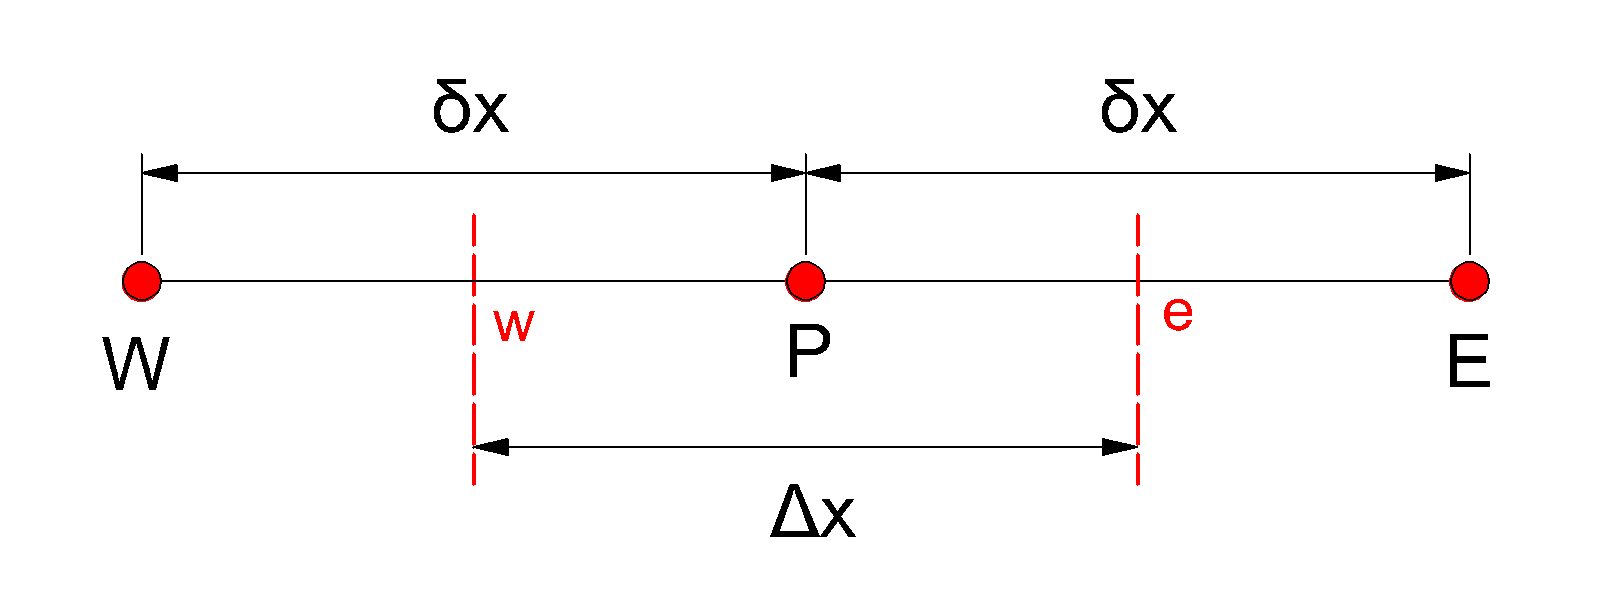

In [6]:
Image('centrais.png', width=500)


O balanço de energia para os nós centrais pode ser escrito como:

$$ \int_{t}^{t + \Delta t}\int_{x_w}^{x_e} \left[ \frac{\partial}{\partial x} \left( k \frac{\partial T}{\partial x} \right) \right] \,dx \, dt = \int_{t}^{t + \Delta t}\int_{x_w}^{x_e} \rho \, C_p \frac{\partial T}{\partial t} \, dx \, dt$$

Considerando uma malha uniforme e que o calor se difunde em um material isotrópico, tem-se:

$$\int_{t}^{t + \Delta t} \left\{  \left( \frac{k}{\Delta x} \right)[(T_E - T_P) - (T_P - T_W)] \right\} \, dt = \rho \, C_p (T_P^{t + \Delta t} - T_P^t)$$

Adotando o **Esquema Totalmente Implícito (f = 1)**, o resultado dessa integral dupla é:

$$ \frac{k}{\Delta x} [(T_E^{t + \Delta t} - T_P^{t + \Delta t}) - (T_P^{t + \Delta t} - T_W^{t + \Delta t})] \, \Delta t = \rho \, C_p \Delta x \, (T_P^{t + \Delta t} - T_P^t)$$

Rearranjando a equação acima e fazendo  $T^{t + \Delta t} \rightarrow T$ e $T^t \rightarrow T^0$, tem -se:

$$\frac{k \, \Delta t}{\rho \, C_p \, \Delta x^2} \, (T_E - 2T_P + T_W) = T_P - T_P^0$$
$$ \alpha \frac{\Delta t}{\Delta x^2} \, (T_E - 2T_P + T_W) = T_P - T_P^0$$

Sabendo que  $\Theta = \frac{T - T_0}{T_L - T_0} \rightarrow T = T_0 + (T_L - T_0) \, \Theta$, podemos aplicar em cada nó:

**- Nó W:** $T_W​=T_0​+(T_L​−T_0​)\Theta_W$​

**- Nó P:** $T_P​=T_0​+(T_L​−T_0​)\Theta_P$​

**- Nó E:** $T_E=T_0​+(T_L​−T_0​)\Theta_E$​

Assim:

$$T_W​ − 2T_P​ + T_E​ = (T_L​−T_0​)(\Theta_W​−2\Theta_P​+\Theta_E​)$$

e

$$T_P​−T_P^0​ = (T_L​−T_0​)(\Theta_P ​− \Theta_P^0​)$$

Substituindo na equação dimensional, tem-se: 

$$(T_L​−T_0​)(\Theta_P ​− \Theta_P^0​) = \alpha \frac{\Delta t}{\Delta x^2} (T_L​−T_0​)(\Theta_W​−2\Theta_P​+\Theta_E​)$$

Cancelando $(T_L​−T_0​)$:

$$(\Theta_P ​− \Theta_P^0​) = \alpha \frac{\Delta t}{\Delta x^2} (\Theta_W​−2\Theta_P​+\Theta_E​)$$

Sabendo que $\Delta X = \frac{\Delta x}{L} \rightarrow \Delta x = L \, \Delta X$, tem-se:

$$(\Theta_P ​− \Theta_P^0​) = \alpha \frac{\Delta t}{L^2 \, \Delta X^2} (\Theta_W​−2\Theta_P​+\Theta_E​)$$

$$(\Theta_P ​− \Theta_P^0​) = \left(\frac{\alpha \, \Delta t}{L^2}\right) \, \left(\frac{1}{\Delta X^2}\right) (\Theta_W​−2\Theta_P​+\Theta_E​)$$

E, lembrando que $\Delta Fo = \frac{\alpha \, \Delta t}{L^2}$:

$$\Theta_P  = \Theta_P^0 + \frac{\Delta Fo}{\Delta X^2} (\Theta_W​−2\Theta_P​+\Theta_E)$$

Rearranjando para obter o formato agébrico clássico:

$$\left(\frac{1}{\Delta Fo} + \frac{2}{\Delta X^2}\right) \Theta_P = \frac{1}{\Delta X^2} \Theta_W + \frac{1}{\Delta X^2}\Theta_E + \frac{1}{\Delta Fo} \Theta_P^0$$

Portanto, a formulação algébrica padrão utilizada no CFD assume a forma:

$$a_P \Theta_P = a_W\Theta_W + a_E\Theta_{E} + b_P$$

Onde os coeficientes são:

| Coeficiente | Expressão |
|---| ---|
| $a_W$ | $\frac{1}{\Delta X^2}$ |
| $a_E$ | $\frac{1}{\Delta X^2} $|
|  $a_P$ | $\frac{1}{\Delta Fo} + \frac{2}{\Delta X^2}$ |
| $b_P$ | $\frac{1}{\Delta Fo} \Theta_P^0$ |

Onde $\Delta X$ é o passo espacial admiensional, $\Delta Fo$ é o passo temporal adimensional e o superescrito "0" indica no tempo anterior.

### Discretização para os nós de fronteira

**1. Dirichlet em $X = 0 \rightarrow \Theta(0, Fo) = 0 $** 

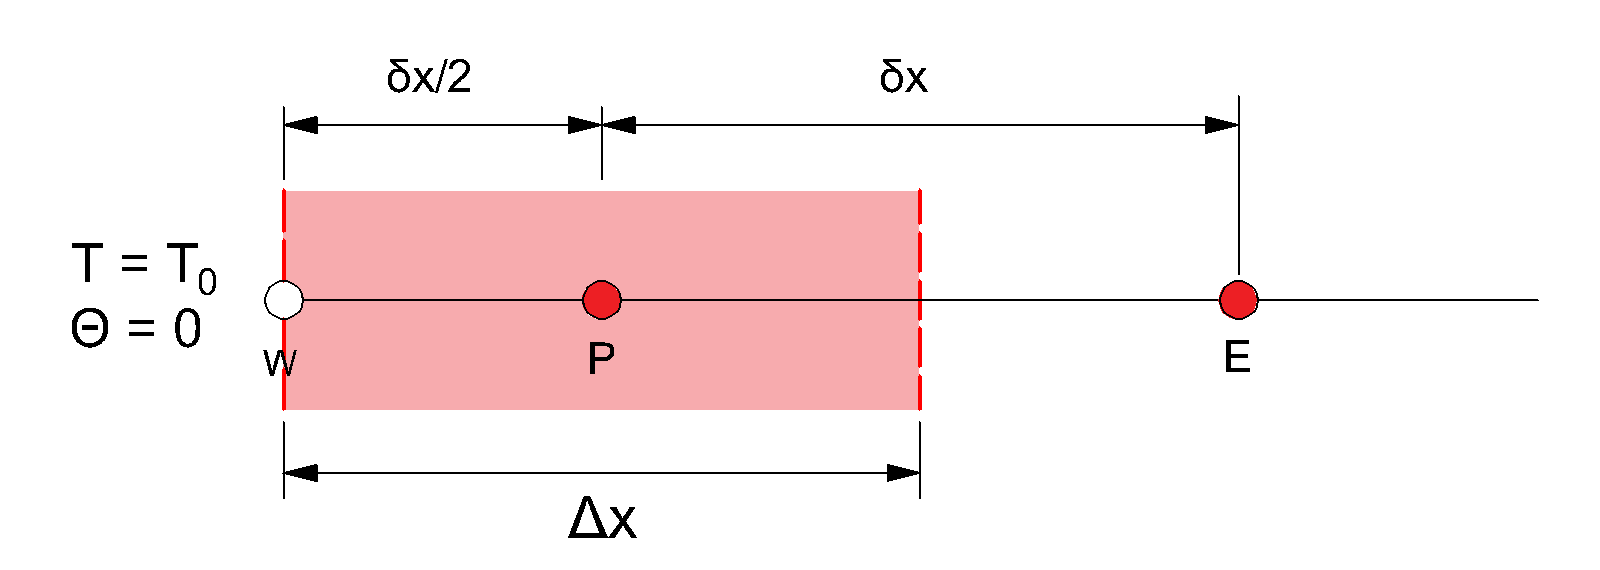

In [7]:
Image("cond_dirichlet.png", width = 500)

A exemplo do que foi feito na discretização dos nós centrais, primeiramente será feita a discretização utilizando os parâmetros dimensionais, e, depois serão introduzidos as definições adimensionais. 

Dessa forma, lembrando que foi adotado o esquema totalmente implícito, e que esse nó apresenta metade do comprimento dos volumes de controle centrais, ou seja, $\Delta x/2$, tem-se o seguinte balanço de energia:

$$\left[\frac{k}{\Delta x} (T_E - T_P) - \frac{k}{\Delta x/2} (T_P - T_0) \right] \Delta t = \rho \, C_p \, \frac{\Delta x}{2} \,(T_P - T_P^0)$$

Isolando $(T_P - T_P^0)$:

$$(T_P - T_P^0) = \frac{k \, \Delta t}{\rho \, C_p} \left[ \frac{2}{\Delta x^2}(T_E - T_P) - \frac{1}{\Delta x^2} (T_P - T_0)\right]$$


$$(T_P - T_P^0) = \alpha \frac{\Delta t}{\Delta x^2} (2T_0 - 3T_P + T_E)$$

Utilizando o conceito de temperatura adimensional:

**Nó W :** $T_W = T_0$

**Nó P :** $T_P = T_0 + (T_L - T_0) \Theta_P$

**Nó E :** $T_E = T_0 + (T_L - T_0) \Theta_E$

Assim: 

$$(2T_0 - 3T_P + T_E) = (T_L - T_0) (-3\Theta_P + \Theta_E)$$

e

$$(T_P - T_P^0) = (T_L - T_0) (\Theta_P - \Theta_P^0)$$


Substituindo na equação dimensional e simplificando os termos:

$$(\Theta_P - \Theta_P^0) = \alpha \frac{\Delta t}{\Delta x^2}(-3\Theta_P + \Theta_E)$$

$$\Theta_P - \Theta_P^0 = \alpha \frac{\Delta t}{L^2 \Delta X^2} (-3\Theta_P + \Theta_E)$$

$$\Theta_P - \Theta_P^0 = \frac{\Delta Fo}{\Delta X^2} (-3\Theta_P + \Theta_E)$$


Desenvolvendo a equação acima e rearranjando os termos da equação acima, obtém-se:

$$\Theta_P \left(\frac{1}{\Delta Fo} + \frac{3}{\Delta X^2}\right) = \frac{1}{\Delta X^2} \Theta_E + \frac{1}{\Delta Fo} \Theta_P^0$$


Dessa forma, a equação algébrica para o primeiro nó interno (i = 1) é expressa por:

$$a_P \Theta_P = a_E \Theta_E + b_P$$

Onde os coeficientes são:

| Coeficiente | Expressão |
| --- | --- |
| $a_P$ |  $\frac{1}{\Delta Fo} + \frac{3}{\Delta X^2}$ |
| $a_W$ | $0$  |
| $a_E$ |  $\frac{1}{\Delta X^2}$ |
|$b_P$ |  $\frac{1}{\Delta Fo} \Theta_P^0$ |

**2. Neumann em $X = 1 \rightarrow \frac{\partial{\Theta}}{\partial{X}} (1,Fo) = 0$** 

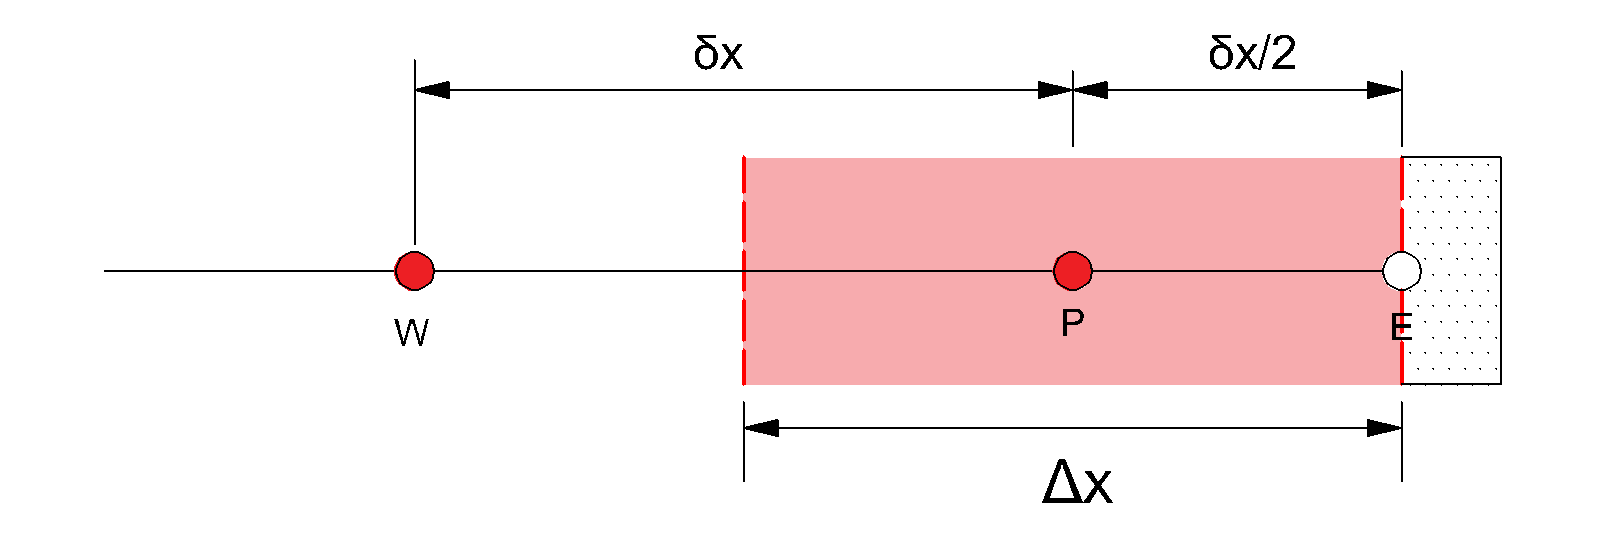

In [8]:
Image("cond_neumann.png", width=500)



Nesse caso, não há troca de calor entre o penúltimo e o último nó. Ademais, ressalta-se que este volume de controle também possui metade do comprimento dos volumes centrais, ou seja, $k \, \frac{T_E - T_P}{\Delta x / 2} = 0$. Portanto, o balanço de energia fica:

$$\left[\frac{k}{\Delta x}(T_P - T_W) - 0 \right] \Delta t = \rho \, C_p \, \frac{\Delta x}{2} (T_P - T_P^0)$$


$$\frac{ 2 k }{\rho C_p \Delta x^2} (T_P - T_W) \Delta t = T_P - T_P^0$$

$$2 \alpha \frac{\Delta t}{\Delta x^2} (T_P - T_W) = T_P - T_P^0$$

Usando $T_i = T_0 + (T_L - T_0)\Theta$, tem-se:

$$T_P - T_W = (T_L - T_0) (\Theta_P - \Theta_W)$$

e 

$$T_P - T_P^0 = (T_L - T_0) (\Theta_P - \Theta_P^0)$$



Substituindo na equação dimensional e simplificando a equação, tem-se:

$$\Theta_P - \Theta_P^0 = 2 \frac{\alpha \Delta t}{\Delta x^2}(\Theta_P - \Theta_W)$$

$$\Theta_P - \Theta_P^0 = 2 \frac{\alpha \Delta t}{\Delta X^2 L^2}(\Theta_P - \Theta_W)$$

$$\Theta_P - \Theta_P^0 = 2 \frac{\Delta Fo}{\Delta X^2}(\Theta_P - \Theta_W)$$

Desevolvendo a equação e rearranjando os termos:

$$\left(\frac{1}{2 \, \Delta Fo} + \frac{1}{\Delta X^2}\right)\Theta_P = \frac{1}{\Delta X^2}\Theta_W+ \frac{1}{2 \Delta Fo} \Theta_P^0$$

O formato algébrico para o penúltimo nó fica:

$$a_P\Theta_P = a_W \Theta_W + b_p$$

Onde os coeficientes são:

|Coeficiente|Expressão|
|---|---|
|$a_P$| $\frac{1}{2 \, \Delta Fo} + \frac{1}{\Delta X^2}$|
|$a_W$| $\frac{1}{\Delta X^2}$|
|$a_E$| 0|
|$b_P$| $\frac{1}{2 \Delta Fo} \Theta_P^0$|

In [9]:
# Definindo os parâmetros da malha

nv = 20          # Número de volumes de controle
n_nos = nv + 2   # Total de nós (incluindo os de contorno)
dx = 1 / nv      # Comprimento adimensional entre os volumes de controle centrais

print(f'O comprimento adimensional do volume de controle dos nós centrais é {dx} e dos nós de fronteira é {dx/2}. ')


O comprimento adimensional do volume de controle dos nós centrais é 0.05 e dos nós de fronteira é 0.025. 


Text(0.5, 0, 'Posição do nó')

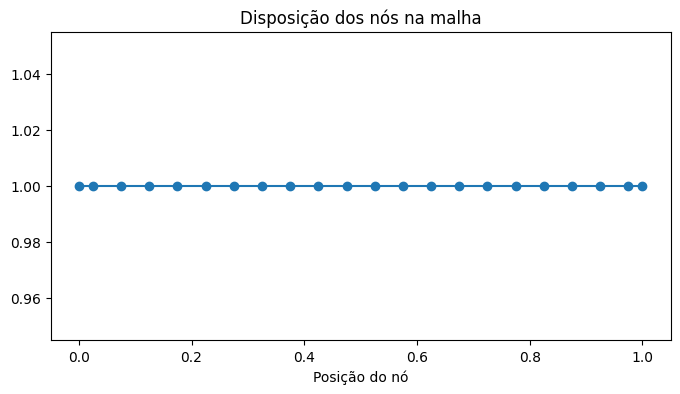

In [10]:
# Criando a malha conforme a prática 2

x_nodes = np.zeros(n_nos)             # Vetor vazio que conterá as posições dos nós
x_nodes[0] = 0                        # Posição do primeiro nó (CC)
x_nodes[1] = dx/2                     # Posição do segundo nó (primeiro nó de fronteira)
for i in range (2, n_nos - 2):        # Nós centrais
    x_nodes[i] = (dx/2) + ((i-1)*dx)
x_nodes[n_nos - 2] = 1 - (dx/2)       # Posição do penúltimo nó
x_nodes[n_nos - 1] = 1                # Posição do último nó
teste = np.full(len(x_nodes),1)

plt.figure(figsize=(8,4))
plt.title('Disposição dos nós na malha')
plt.plot(x_nodes, teste, 'o-')
plt.xlabel("Posição do nó")

In [11]:
# Condição inicial (CI): Theta(X, 0) = X
Theta = x_nodes.copy()    # No começo a distrinuição adimensional da temperatura é igual à posição adimensional, condizente com a suposição de perfil linear
Theta_old = Theta.copy()  # Temperatura do passo anterior (necessária para a implementação do método implícito)

In [12]:
# Parâmetros temporais
dFo = 0.1 * dx  # Passo de tempo adimensional (número de Fourier) -> foi escolhido 0.1 * dx para garatia de estabilidade numérica
Fo = 0          # Tempo adimensional atual (começa em zero)

In [13]:
# Coeficientes constantes dos nós centrais
aw = ae = 1 / dx**2
ap = (1/dFo) + (2 / dx**2)

In [14]:
# Loop de tempo
results = []     # Armazena os resultados de Theta em X = 1
iterations = 0   # Contador de passos no tempo

In [15]:
# Criando um loop para executar a simulação enquanto Theta estiver acima de 0.5  0.5, não 
while Theta[n_nos - 2] >= 0.5:
    # Vetores da matriz TDMA
    a = np.zeros(n_nos)  # Diagonal principal
    b = np.zeros(n_nos)  # Subdiagonal (vizinha esquerda)
    c = np.zeros(n_nos)  # Superdiagonal (vizinha direita)
    d = np.zeros(n_nos)  # Lado direito 

    # Nó 2 (primeiro nó de fronteira) - CC em X = 0: Theta(0, Fo) = 0 (Dirichlet)
    # Coeficientes da matriz de Thomas do nó 2
    a[1] = (1 / dFo) + (3 / (dx**2))
    b[1] = 0 # Não há vizinho à esquerda
    c[1] = 1 / (dx**2)
    d[1] = (1 / dFo) * Theta_old[1]

    # Cálculo dos coeficientes dos nós centrais (de 2 até n - 2)
    for i in range(2, n_nos - 2):
        a[i] = ap 
        b[i] = aw
        c[i] = ae
        d[i] = (1 / dFo) * Theta_old[i]

    # Penúltimo nó (último nó de fronteira) - CC em X = 1: dΘ/dX = 0 (Neumann)
    # Cálculo dos coeficientes do penúltimo nó (último nó interno) - CC em X = 1: dTheta/dX = 0 (Neumann)
    c[n_nos - 2] = 0  # Não há vizinho à direita
    b[n_nos - 2] = 1 / (dx**2)
    a[n_nos - 2] = (1 / (2 * dFo)) + (1 / (dx**2))
    d[n_nos - 2] = (1 / (2*dFo)) * Theta_old[n_nos - 2]

    # Algoritmo TDMA
    P = np.zeros(n_nos)
    Q = np.zeros(n_nos)
    Theta_new = Theta.copy()

    # Passo 1 - Cálculo do par P(1), Q(1) - referente ao primeiro nó de fronteira
    P[1] = c[1] / a[1]
    Q[1] = d[1] / a[1]

    # Passo 2 - Cálculo de todos os pares P(i), Q(i) 
    for i in range(2, n_nos - 1):
        denom = a[i] - (b[i] * P[i - 1])
        P[i] = c[i] / denom
        Q[i] = (d[i] + b[i] * Q[i - 1]) / denom

    # Passo 3 - Cálculo de T(N - 2) = Q(N - 2) - referente ao último nó de fronteira
    Theta_new[n_nos - 2] = Q[n_nos - 2]

    # Passo 4 - Cálculo de T para todos os pontos nodais de (N-2) até o nó 1
    for i in range(n_nos - 3, 0, -1):
        Theta_new[i] = P[i] * Theta_new[i + 1] + Q[i]

    # Mantendo as condições de contorno
    Theta_new[0] = 0                            # CC de Dirichlet em X = 0
    Theta_new[n_nos - 1] = Theta_new[n_nos - 2] # CC de Neumann em X = L = 1

    # Atualizar
    Theta_old = Theta_new.copy()
    Theta = Theta_new.copy()
    Fo += dFo
    iterations += 1

    # Armazenar resultado de interesse: Theta em X=1 (último nó interno)
    results.append([Fo, Theta[n_nos - 2]])   

In [16]:
results = np.array(results)
Fo_final = Fo

display(Math(r'\text{Iterações: }' + f'{iterations}'))
display(Math(r'\text{Fo final: }' + f'{Fo_final:.4f}'))
display(Math(r'\Theta \text{ final em X=1: }' + f'{Theta[n_nos - 2]:.4f}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

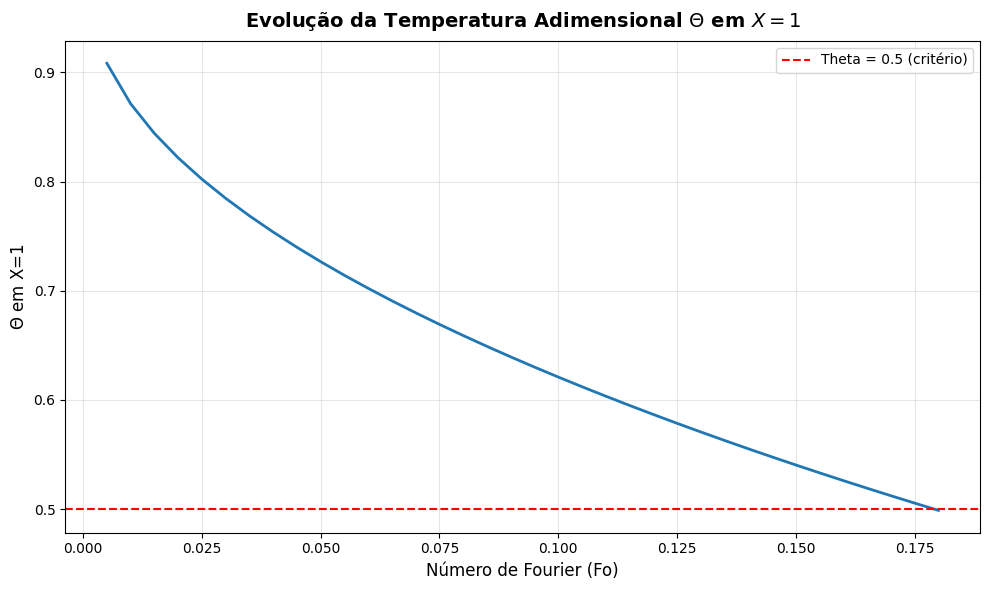

In [17]:
# Plotar evolução de Theta em X=1
plt.figure(figsize=(10, 6))
plt.plot(results[:, 0], results[:, 1], '-', linewidth=2)  # ← CORRIGIDO
plt.axhline(y=0.5, color='r', linestyle='--', label='Theta = 0.5 (critério)')
plt.xlabel('Número de Fourier (Fo)', fontsize=12)
plt.ylabel(r'$\Theta$ em X=1', fontsize=12)
plt.title(r'Evolução da Temperatura Adimensional $\Theta$ em $X=1$', 
          fontsize=14, 
          fontweight='bold',
          pad=10)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

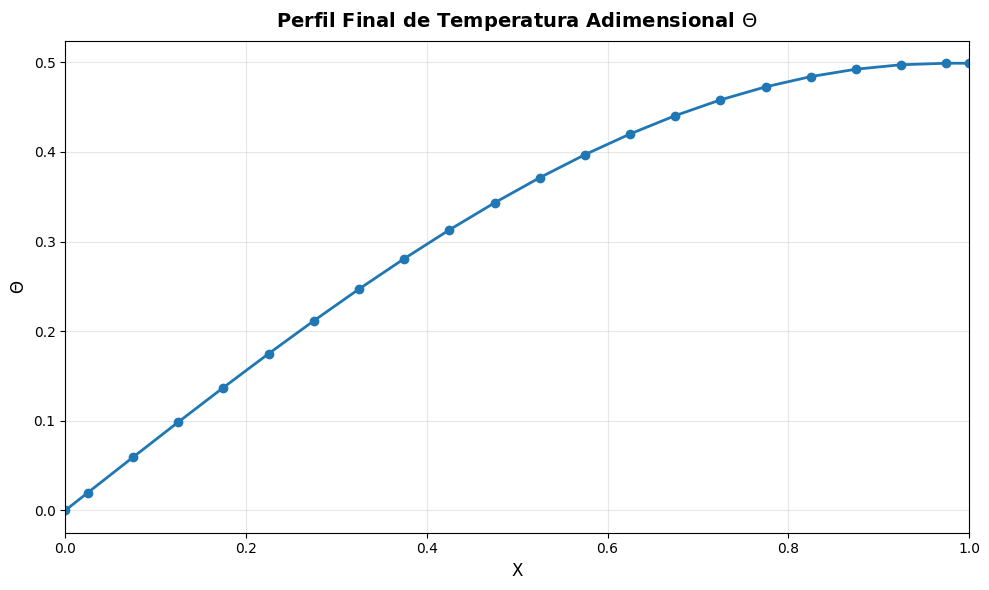

In [18]:
# Plotar perfil final de temperatura
plt.figure(figsize=(10, 6))
plt.plot(x_nodes, Theta, 'o-', linewidth=2, markersize=6) 
plt.xlabel('X', fontsize=12)
plt.ylabel(r'$\Theta$', fontsize=12)
plt.title(r'Perfil Final de Temperatura Adimensional $\Theta$', 
          fontsize=14, 
          fontweight='bold',
          pad=10)
plt.grid(True, alpha=0.3)
plt.xlim([0, 1])
plt.tight_layout()
plt.show()

## Conclusão

Ao final deste trabalho, pôde-se concluir que os resultados obtidos foram satisfatórios, uma vez que, após 36 iterações, correspondentes a um número de Fourier final de $Fo = 0{,}1800$, a distribuição adimensional de temperatura $\Theta$ no ponto $X = 1$ atingiu o valor de 0,4989. Esse resultado atende ao critério estabelecido no enunciado do problema, uma vez que o valor obtido é inferior a 0,5.